In [1]:
from aqua import Reader
import sys
sys.path.insert(0, '../../')
from global_biases import GlobalBiases

from dask.distributed import Client
client = Client()


/LUMI_TYKKY_ftT6c0t/miniconda/envs/env1/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33169 instead
  warnings.warn(


In [2]:
reader_era5 = Reader(model="ERA5", exp="era5", source="monthly")
data_era5 = reader_era5.retrieve()

reader_ifs_nemo = Reader(model = 'IFS-NEMO', exp = 'historical-1990', source = 'lra-r100-monthly')
data_ifs_nemo = reader_ifs_nemo.retrieve(startdate="1990-01-01", enddate="2002-02-01")

reader_ceres = Reader(model="CERES", exp="ebaf-toa41", source="monthly")
data_ceres = reader_ceres.retrieve()

2024-07-10 18:08:30 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-07-10 18:08:32 :: eccodes :: WARNING  -> ShortName tcc has multiple grib codes associated: ['228164', '164']
2024-07-10 18:08:32 :: eccodes :: WARNING  -> AQUA will take the first so that tcc -> 228164, please set up a correct fix if this does not look right
2024-07-10 18:08:32 :: eccodes :: WARNING  -> ShortName lcc has multiple grib codes associated: ['3073', '186']
2024-07-10 18:08:32 :: eccodes :: WARNING  -> AQUA will take the first so that lcc -> 3073, please set up a correct fix if this does not look right
2024-07-10 18:08:32 :: eccodes :: WARNING  -> ShortName mcc has multiple grib codes associated: ['3074', '187']
2024-07-10 18:08:32 :: eccodes :: WARNING  -> AQUA will take the first so that mcc -> 3074, please set up a correct fix if this does not look right
2024-07-10 18:08:32 :: eccodes :: WARNING  -

In [3]:
global_biases = GlobalBiases(data=data_ifs_nemo, data_ref=data_era5, var_name='2t', loglevel = 'INFO')

2024-07-10 18:08:56 :: Atmospheric global :: INFO     -> Processing data.


2024-07-10 18:08:56 :: Atmospheric global :: INFO     -> Plotting global biases.
2024-07-10 18:08:56 :: Atmospheric global :: INFO     -> Plotting bias map between two datasets.


2024-07-10 18:09:27 :: Atmospheric global :: INFO     -> Plotting seasonal biases.
/LUMI_TYKKY_ftT6c0t/miniconda/envs/env1/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args, **kwargs)
/LUMI_TYKKY_ftT6c0t/miniconda/envs/env1/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args, **kwargs)
/LUMI_TYKKY_ftT6c0t/miniconda/envs/env1/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args, **kwargs)
/LUMI_TYKKY_ftT6c0t/miniconda/envs/env1/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args,

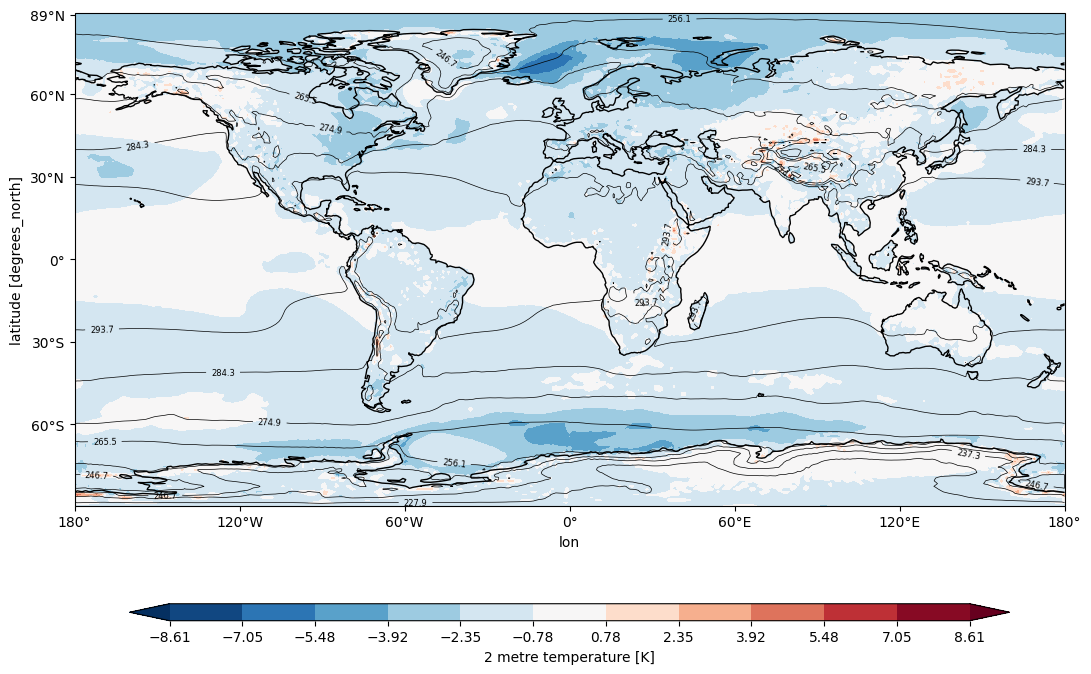

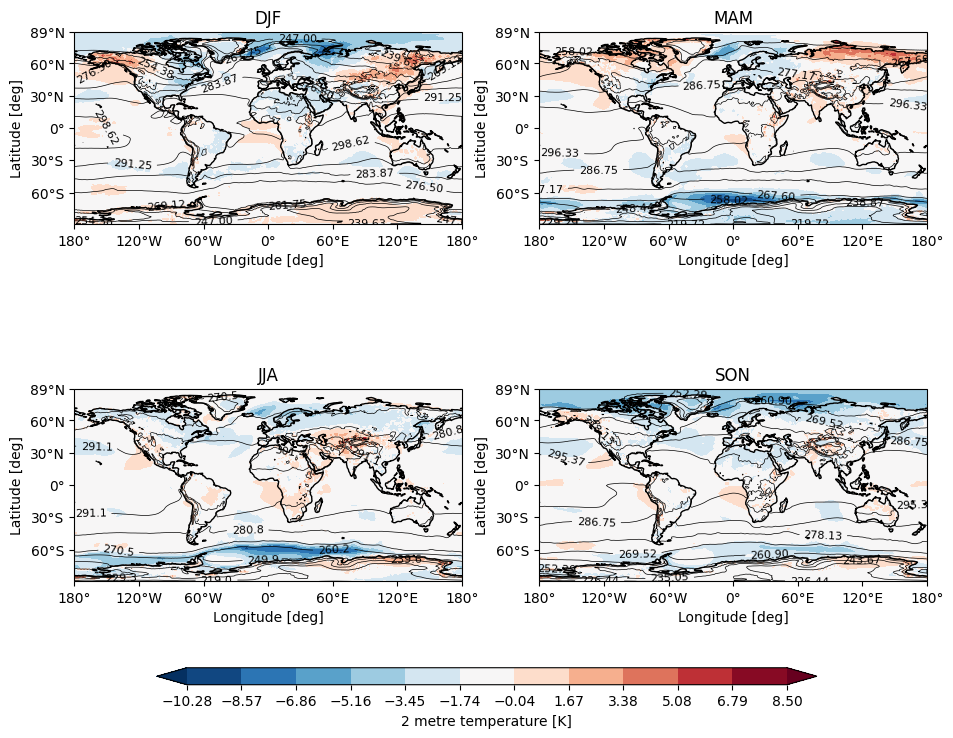

In [4]:
seasonal_data = global_biases.plot_bias(seasons=True)

2024-07-10 18:12:44 :: Atmospheric global :: INFO     -> Plotting vertical biases.
2024-07-10 18:12:44 :: Atmospheric global :: INFO     -> Computing climatology for reference dataset.
2024-07-10 18:12:44 :: Atmospheric global :: INFO     -> Calculating bias between datasets.
2024-07-10 18:12:44 :: Atmospheric global :: INFO     -> Calculating mean bias along the time axis.
2024-07-10 18:12:44 :: Atmospheric global :: INFO     -> Calculating zonal mean bias.
2024-07-10 18:12:44 :: Atmospheric global :: INFO     -> Plotting the zonal bias.


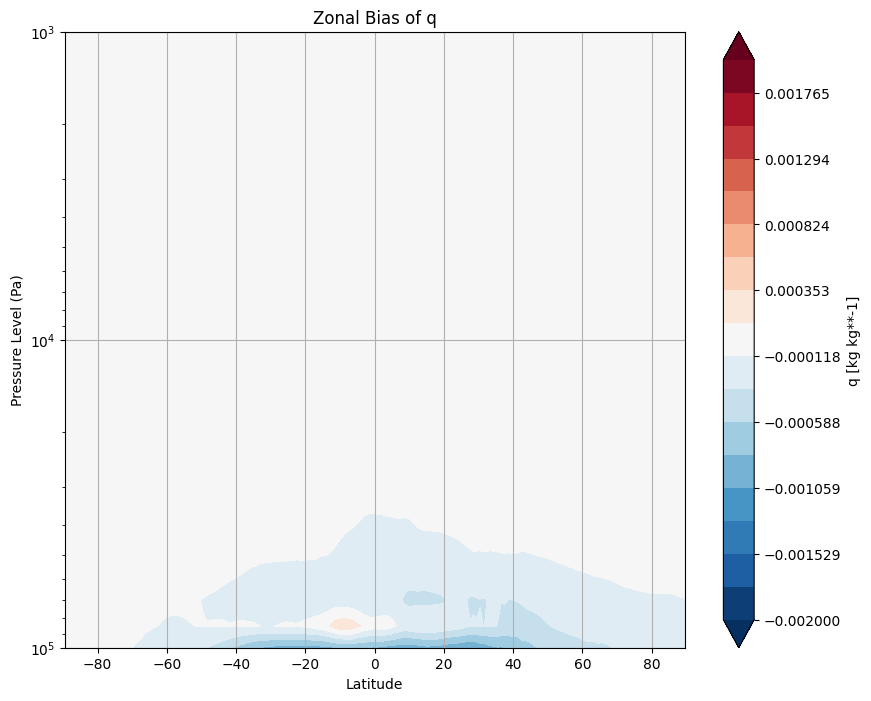

In [5]:
global_biases.plot_vertical_bias(var_name='q', vmin= -0.002, vmax= 0.002)

2024-07-10 18:13:23 :: Boxplot :: INFO     -> Generating boxplot.
2024-07-10 18:13:34 :: Boxplot :: INFO     -> Processed variable mtnlwrf for dataset ERA5 with units W m**-2.
2024-07-10 18:13:44 :: Boxplot :: INFO     -> Processed variable mtnswrf for dataset ERA5 with units W m**-2.
2024-07-10 18:13:45 :: Boxplot :: INFO     -> Processed variable mtnlwrf for dataset CERES with units W m-2.
2024-07-10 18:13:47 :: Boxplot :: INFO     -> Processed variable mtnswrf for dataset CERES with units W m-2.
2024-07-10 18:13:49 :: Boxplot :: INFO     -> Processed variable mtnlwrf for dataset IFS-NEMO with units W m**-2.
2024-07-10 18:13:51 :: Boxplot :: INFO     -> Processed variable mtnswrf for dataset IFS-NEMO with units W m**-2.
2024-07-10 18:13:51 :: Boxplot :: INFO     -> Plotting the boxplot.


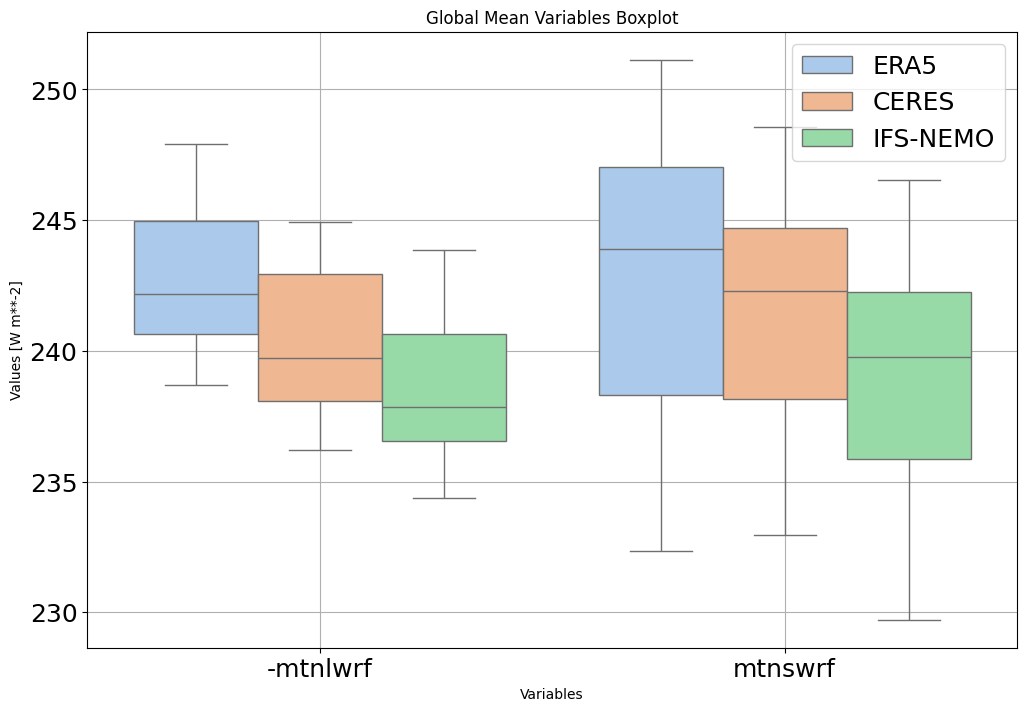

In [6]:
global_biases.boxplot(datasets=[data_era5, data_ceres,  data_ifs_nemo], variables=['-mtnlwrf', 'mtnswrf'], model_names=['ERA5', 'CERES', 'IFS-NEMO'])

